In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT

Welcome to JupyROOT 6.10/08


In [2]:
#inputdir = '/home/tmettler/Desktop/ub_data/ub_xsec/ConsolidatedSliceAnalyser/ext/'

# CRTinBNB tagger, Overlay or MC

In [3]:
#file = uproot.open( inputdir + 'NeutSlices_QP_allExt_withVertex.root_ana.root')
#file.keys("a") 

In [4]:
#slices = file['t_slice']
#print 'Number of entries: ', slices.numentries
#slices.keys()

In [5]:
inputdir = '/home/tmettler/Desktop/ub_data/NeutrinoMatcher/'
outputdir = '/home/tmettler/Desktop/ub_data/NeutrinoMatcher/bla/'
try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)
#filename = 'NeutrinoCRTMatcher_QP_MC_BNB_10k.root'
#filename = 'NeutrinoCRTMatcher_QP_Overlay_bigWindow.root'
#filename = 'NeutrinoCRTMatcher_QP_6500_bigWindow.root'
filename = 'NeutrinoCRTMatcher_QP_EXT_all.root'

isMC = 0
useT1 = 0

In [6]:
test = ROOT.TChain("peb/my_event","my_event")
test.Add( inputdir + filename)

#test.ls()
print "Number of Entries:", test.GetEntries()
# uncomment one of them
cutname = 'has_nuslice'

cut = ' && ' + cutname
#cut = ''

title_cut = ''
if(cut!=''):
    title_cut = ' with '+ cutname


Number of Entries: 65672


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [7]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("","",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/NeutrinoMatcher/bla/h_bnbtime.png has been created


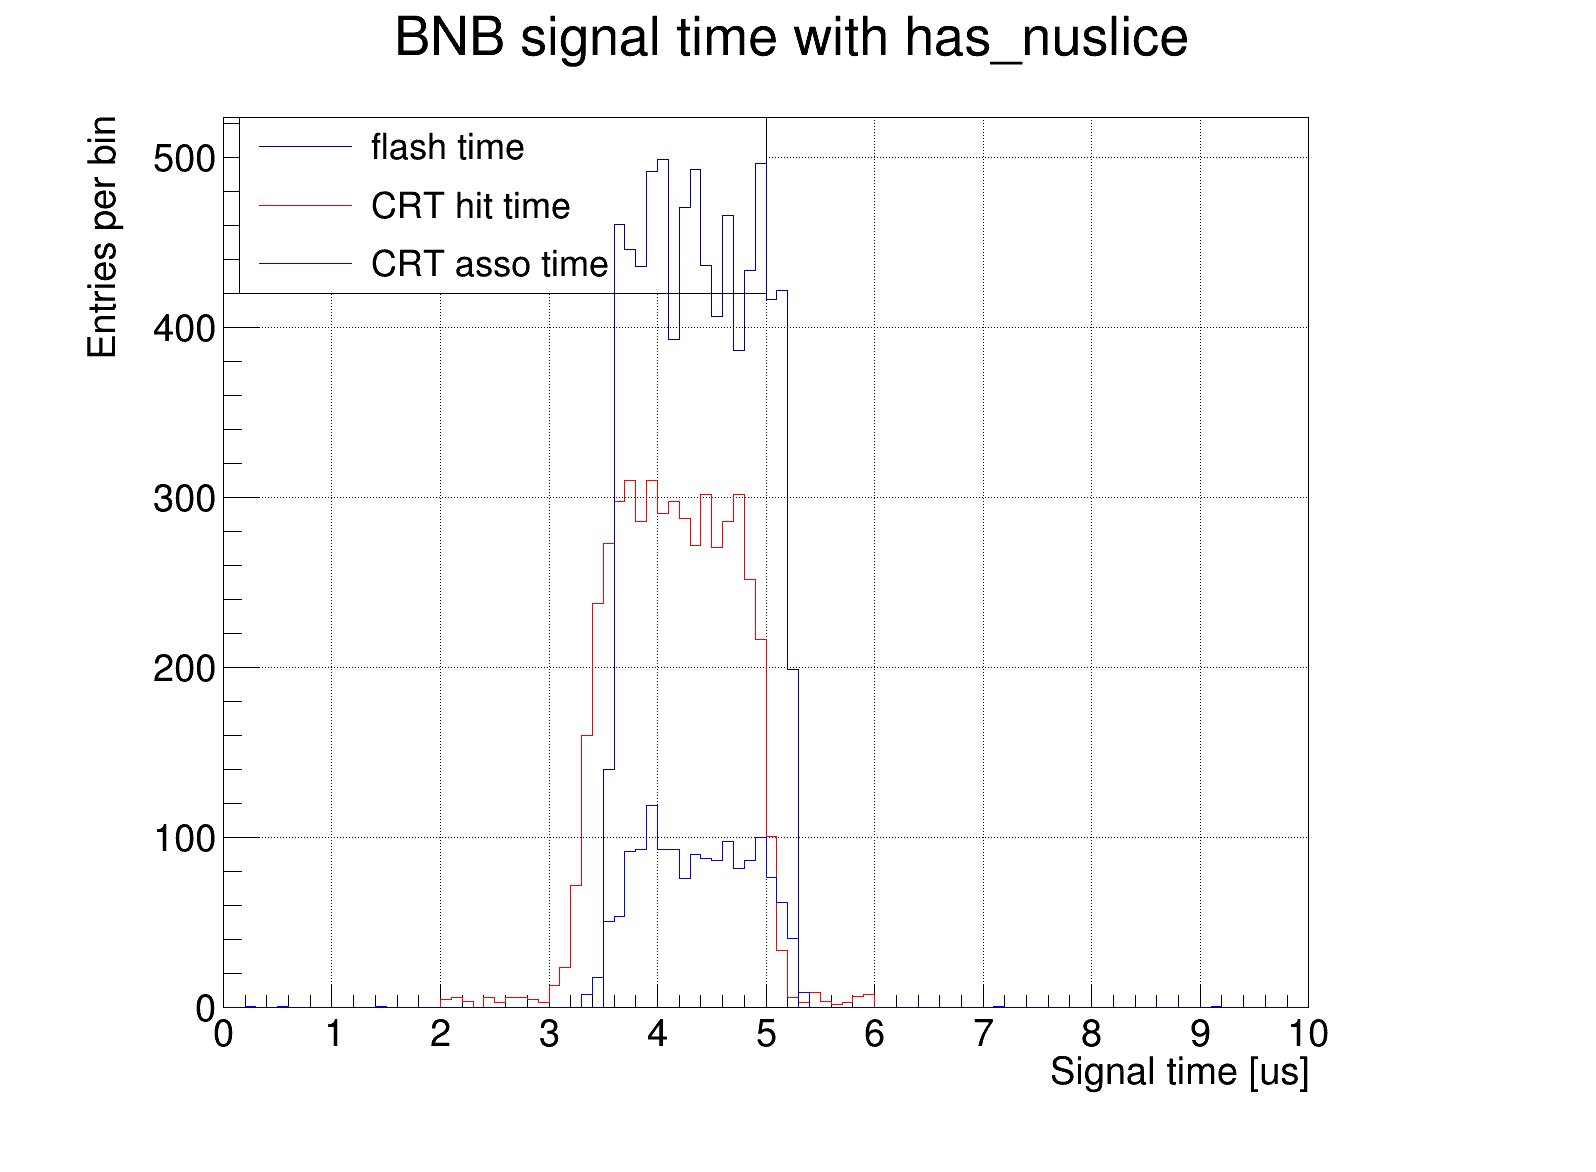

In [8]:
if(isMC==0):
    h_bnbtime = ROOT.TH1F("h_bnbtime","BNB signal time" + title_cut,100,0,10)
    h_bnbtime1 = ROOT.TH1F("h_bnbtime1","CRT ts0",100,0,10)
    h_bnbtime2 = ROOT.TH1F("h_bnbtime2","CRT ts0",100,0,10)
    h_bnbtime3 = ROOT.TH1F("h_bnbtime3","CRT ts0",100,0,10)

    test.Draw('flash_time>>h_bnbtime','1' + cut)
    test.Draw('crthit_ts0>>h_bnbtime1','has_crthit' + cut)
    test.Draw('crtt0_time>>h_bnbtime3','has_crtasso' + cut)
    h_bnbtime1.SetLineColorAlpha(2, 1)
    h_bnbtime3.SetLineColorAlpha(4, 1)
    h_bnbtime.SetXTitle("Signal time [us]")
    h_bnbtime.SetYTitle("Entries per bin")
    
    if(useT1==1):
        test.Draw('crthit_ts1>>h_bnbtime2','has_crthit' + cut)
        h_bnbtime2.SetLineColorAlpha(3, 1)

    legend = ROOT.TLegend(0.15,0.75,0.48,0.9)
    #legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
    legend.AddEntry(h_bnbtime,"flash time","l")
    legend.AddEntry(h_bnbtime1,"CRT hit time","l")
    #legend.AddEntry(h_bnbtime2,"CRT hit time MC","l");
    legend.AddEntry(h_bnbtime3,"CRT asso time","l");
    #h_x.SetStats(1);
    h_bnbtime.Draw();
    h_bnbtime1.Draw("same");
    if(useT1==1):
        h_bnbtime2.Draw("same");
        legend.AddEntry(h_bnbtime2,"CRT hit time ts1","l")
    h_bnbtime3.Draw("same");
    legend.Draw();
    h_bnbtime.Draw("same");

    c1.Draw()
    c1.SaveAs(outputdir + "h_bnbtime.png");

In [9]:
# generate Vertex x position plot
if(isMC==1):
    h_bnbtime = ROOT.TH1F("h_bnbtime","BNB signal time" + title_cut,100,0,10)
    h_bnbtime1 = ROOT.TH1F("h_bnbtime1","CRT ts0",100,0,10)
    h_bnbtime2 = ROOT.TH1F("h_bnbtime2","CRT ts0",100,0,10)
    h_bnbtime3 = ROOT.TH1F("h_bnbtime3","CRT ts0",100,0,10)

    test.Draw('flash_time>>h_bnbtime','1' + cut)
    test.Draw('crthit_ts0>>h_bnbtime1','has_crthit && adc_length==32' + cut)
    test.Draw('crthit_ts0>>h_bnbtime2','has_crthit && adc_length<32' + cut)
    test.Draw('crtt0_time>>h_bnbtime3','has_crtasso' + cut)
    h_bnbtime1.SetLineColorAlpha(2, 1);
    h_bnbtime2.SetLineColorAlpha(3, 1);
    h_bnbtime3.SetLineColorAlpha(4, 1);
    h_bnbtime.SetXTitle("Signal time [us]");
    h_bnbtime.SetYTitle("Entries per bin");

    legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
    #legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
    legend.AddEntry(h_bnbtime,"flash time","l");
    legend.AddEntry(h_bnbtime1,"CRT hit time","l");
    legend.AddEntry(h_bnbtime2,"CRT hit time MC","l");
    legend.AddEntry(h_bnbtime3,"CRT asso time","l");
    #h_x.SetStats(1);
    h_bnbtime.Draw();
    h_bnbtime1.Draw("same");
    h_bnbtime2.Draw("same");
    h_bnbtime3.Draw("same");
    legend.Draw();
    h_bnbtime.Draw("same");

    c1.Draw()
    c1.SaveAs(outputdir + "h_bnbtime.png");

In [10]:
# generate number of BNB CRT hits plot
if(isMC==1):
    h_nrCrthit = ROOT.TH1F("h_nrCrthit","CRT signal time" + title_cut,20,0,20)
    h_nrCrthit1 = ROOT.TH1F("h_nrCrthit1","CRT ts0",20,0,20)
    h_nrCrthit2 = ROOT.TH1F("h_nrCrthit2","CRT ts0",20,0,20)

    test.Draw('nr_crthit>>h_nrCrthit','1' + cut)
    test.Draw('nr_crthit>>h_nrCrthit1','has_crthit && adc_length==32' + cut)
    test.Draw('nr_crthit>>h_nrCrthit2','has_crthit && adc_length<32' + cut)
    h_nrCrthit1.SetLineColorAlpha(2, 1);
    h_nrCrthit2.SetLineColorAlpha(3, 1);
    h_nrCrthit.SetXTitle("Signal time [us]");
    h_nrCrthit.SetYTitle("Entries per bin");

    legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
    #legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
    legend.AddEntry(h_nrCrthit,"All CRT hit time","l");
    legend.AddEntry(h_nrCrthit1,"EXT","l");
    legend.AddEntry(h_nrCrthit2,"MC","l");
    #h_x.SetStats(1);
    h_nrCrthit.Draw();
    h_nrCrthit1.Draw("same");
    h_nrCrthit2.Draw("same");
    legend.Draw();
    h_nrCrthit.Draw("same");

    c1.Draw()
    c1.SaveAs(outputdir + "h_nrCrthit.png");
    print 'Number of Entries:', h_nrCrthit.Integral()
    print 'Number of Entries with EXT CRT hit:', h_nrCrthit1.Integral()
    print 'Number of Entries with MC CRT hit:', h_nrCrthit2.Integral()

    print 'Amount of Entries with EXT CRT hit:', h_nrCrthit1.Integral()*100/h_nrCrthit.Integral()
    print 'Amount of Entries with MC CRT hit:', h_nrCrthit2.Integral()*100/h_nrCrthit.Integral()

In [11]:
# generate number of BNB CRT hits plot
if(isMC==1):
    h_flash_crt = ROOT.TH1F("h_flash_crt","Flash time - CRT time" + title_cut,500,-5,5)
    h_flash_crt1 = ROOT.TH1F("h_flash_crt1","CRT ts0",500,-5,5)


    test.Draw('flash_time - crthit_ts0>>h_flash_crt','has_flash  && adc_length==32' + cut)
    test.Draw('flash_time - crthit_ts0>>h_flash_crt1','has_flash && adc_length<32 && has_crthit' + cut)

    h_flash_crt1.SetLineColorAlpha(2, 1);
    h_flash_crt.SetXTitle("Signal time [us]");
    h_flash_crt.SetYTitle("Entries per bin");

    legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
    #legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
    legend.AddEntry(h_flash_crt,"EXT","l");
    legend.AddEntry(h_flash_crt,"MC","l");
    #h_x.SetStats(1);
    h_flash_crt.Draw();
    h_flash_crt1.Draw("same");
    legend.Draw();
    h_flash_crt.Draw("same");

    c1.Draw()
    c1.SaveAs(outputdir + "h_flash_crt.png");
    rebinfactor = 2
    h_flash_crt_re = h_flash_crt.Rebin(rebinfactor)
    h_flash_crt_re.Scale(1.0/rebinfactor)
    h_flash_crt_re1 = h_flash_crt1.Rebin(rebinfactor)
    h_flash_crt_re1.Scale(1.0/rebinfactor)

    h_flash_crt_re1.Draw('HIST')
    h_flash_crt_re.Draw('HIST same')
    c1.Draw()
    c1.SaveAs(outputdir + "h_flash_crt_re.png");

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/NeutrinoMatcher/bla/h_diff_crtt0_crt.png has been created


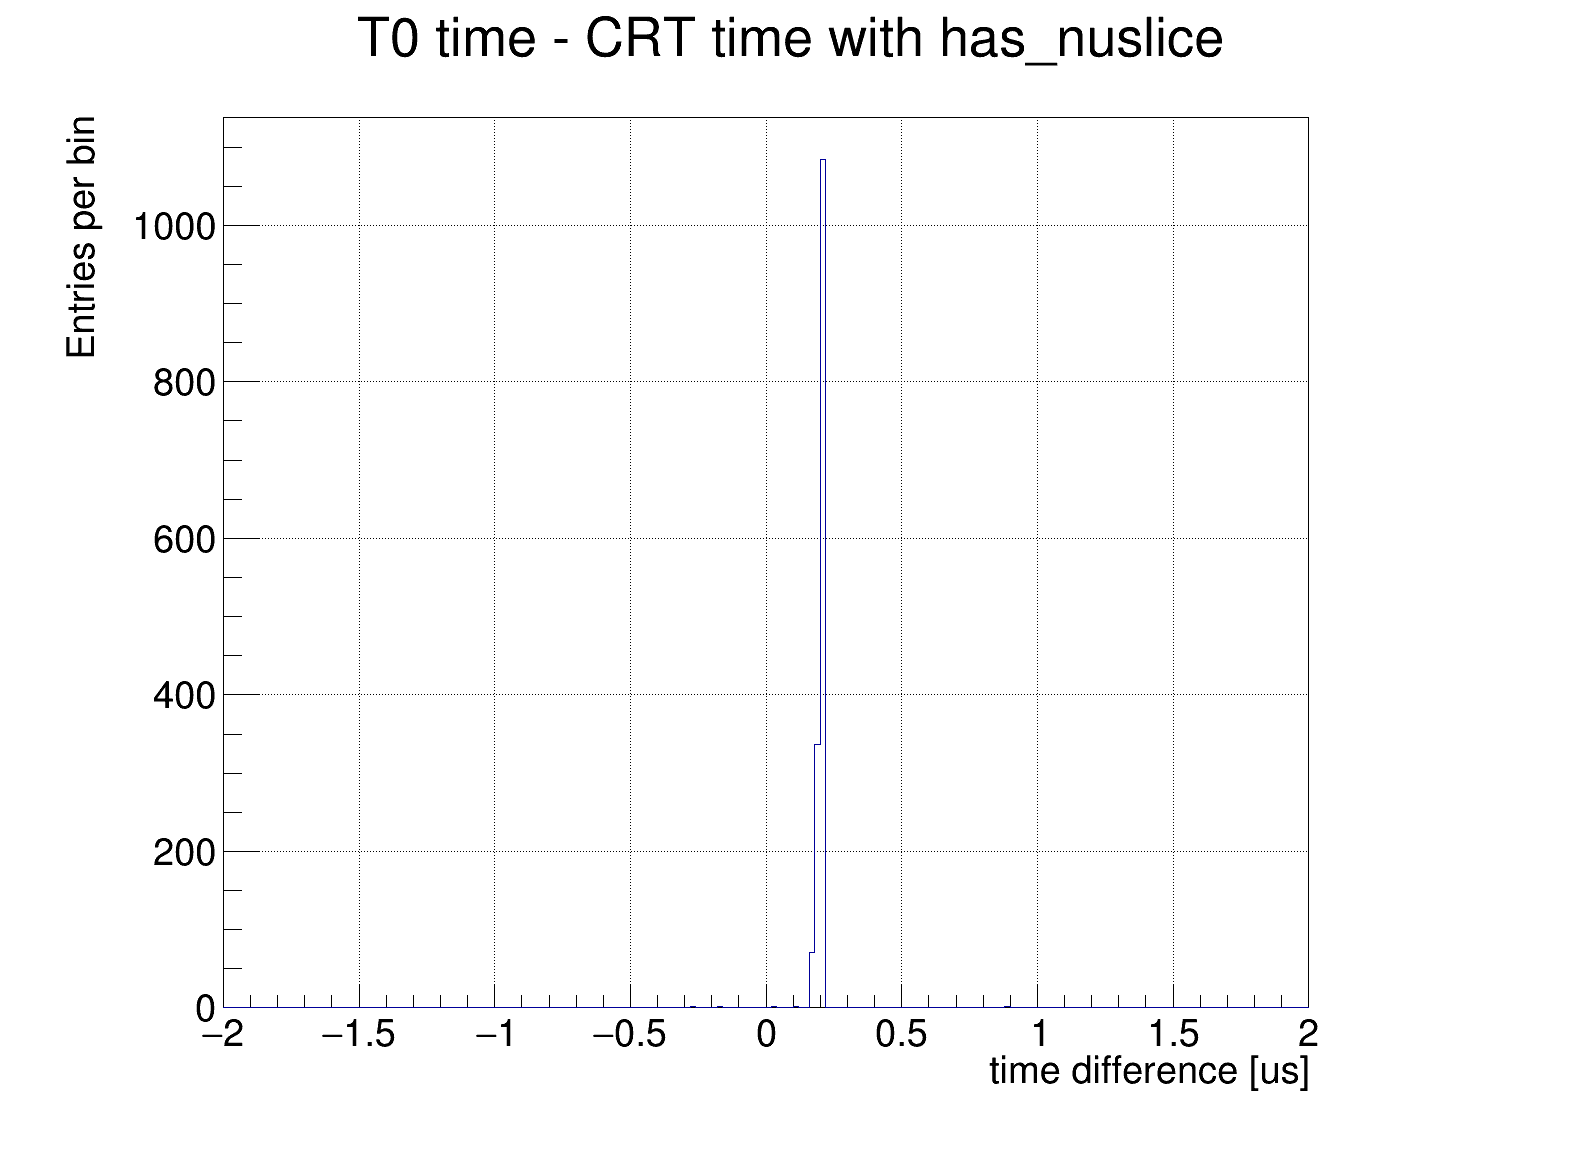

In [12]:
h_diff_crtt0_crt = ROOT.TH1F("h_diff_crtt0_crt","T0 time - CRT time" + title_cut,200,-2,2)

test.Draw('crtt0_time - crthit_ts0>>h_diff_crtt0_crt','has_crthit && has_crtasso' + cut)
h_diff_crtt0_crt.SetXTitle("time difference [us]");
h_diff_crtt0_crt.SetYTitle("Entries per bin");

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
#legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
legend.AddEntry(h_diff_crtt0_crt,"EXT","l");
#h_x.SetStats(1);
h_diff_crtt0_crt.Draw();
#legend.Draw();
h_diff_crtt0_crt.Draw("same");

c1.Draw()
c1.SaveAs(outputdir + "h_diff_crtt0_crt.png");

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/NeutrinoMatcher/bla/h_flash_crt.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/NeutrinoMatcher/bla/h_flash_crt_re.png has been created


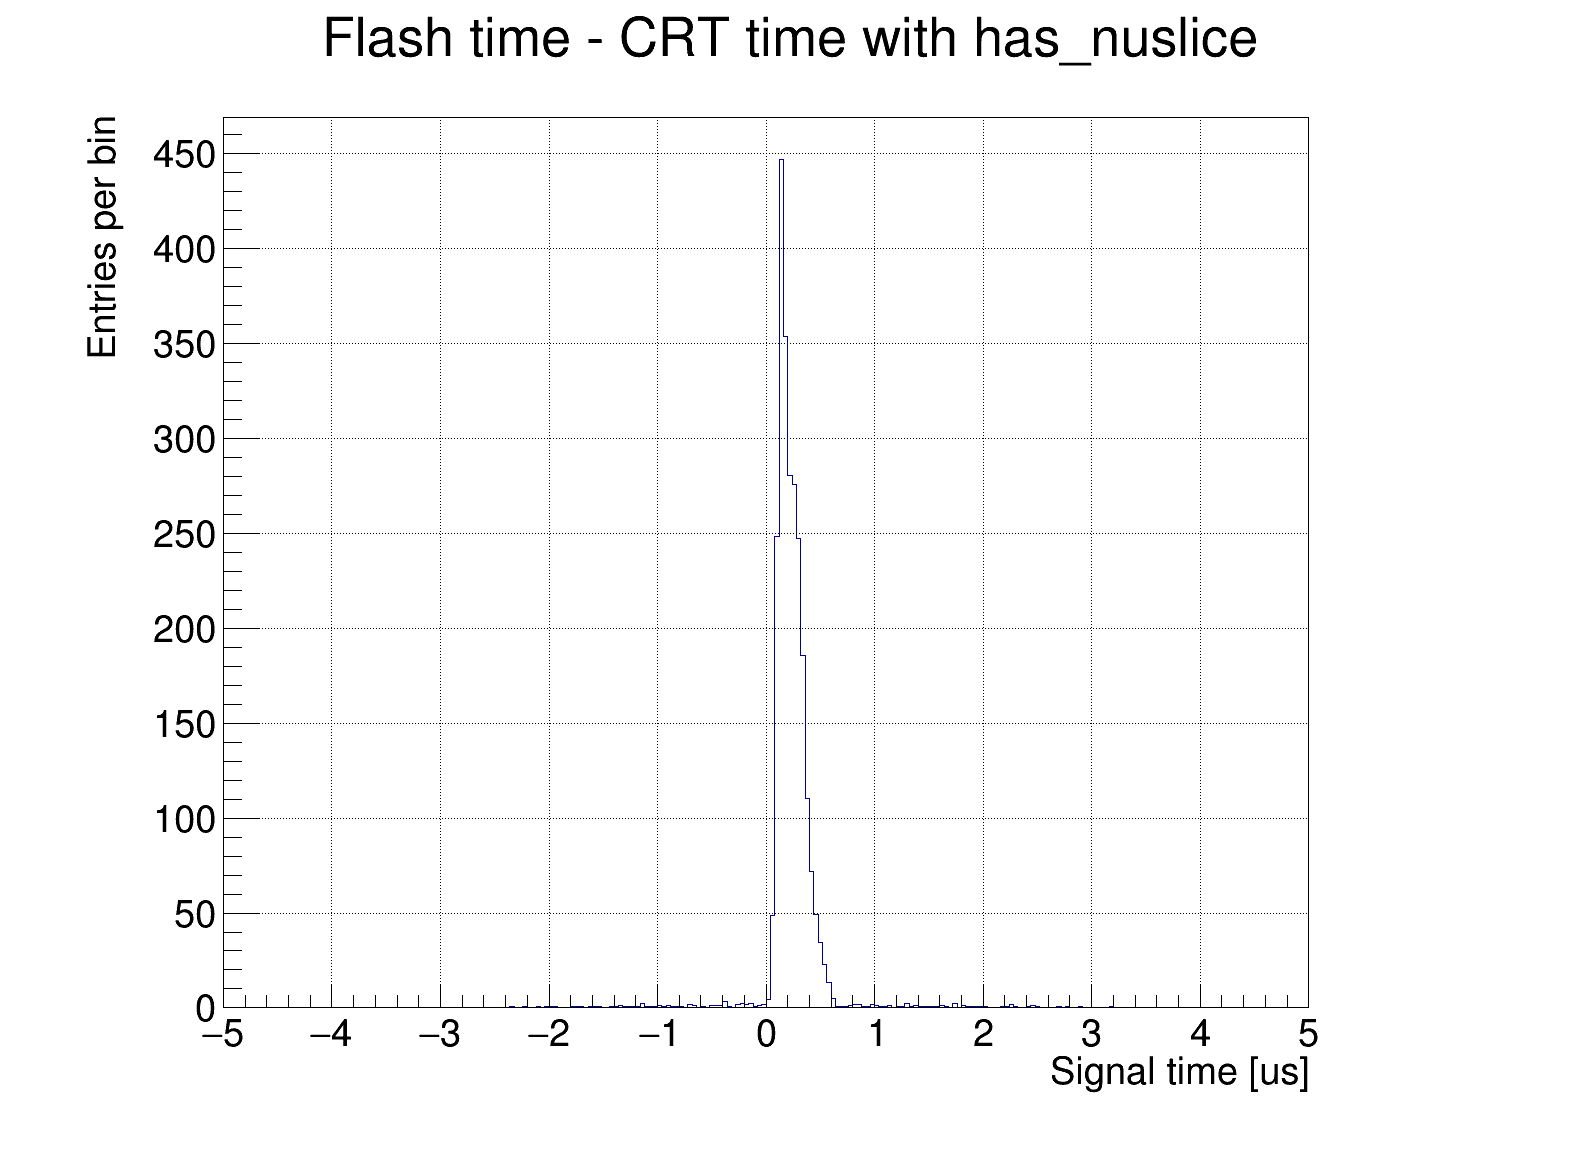

In [13]:
if(isMC==0):
    h_flash_crt = ROOT.TH1F("h_flash_crt","Flash time - CRT time" + title_cut,500,-5,5)
    h_flash_crt1 = ROOT.TH1F("h_flash_crt1","CRT ts0",500,-5,5)


    test.Draw('flash_time - crthit_ts0>>h_flash_crt','has_flash  && has_crthit' + cut)
    #test.Draw('flash_time - crthit_ts0>>h_flash_crt1','has_flash && adc_length<32 && has_crthit' + cut)

    #h_flash_crt1.SetLineColorAlpha(2, 1);
    h_flash_crt.SetXTitle("Signal time [us]");
    h_flash_crt.SetYTitle("Entries per bin");

    #legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
    #legend = ROOT.TLegend(0.5, 0.5, 0.75, 0.75)
    #legend.AddEntry(h_flash_crt,"EXT","l");
    #legend.AddEntry(h_flash_crt,"MC","l");
    #h_x.SetStats(1);
    h_flash_crt.Draw();
    #h_flash_crt1.Draw("same");
    #legend.Draw();
    #h_flash_crt.Draw("same");

    c1.Draw()
    c1.SaveAs(outputdir + "h_flash_crt.png");
    rebinfactor = 2
    h_flash_crt_re = h_flash_crt.Rebin(rebinfactor)
    h_flash_crt_re.Scale(1.0/rebinfactor)
    #h_flash_crt_re1 = h_flash_crt1.Rebin(rebinfactor)
    #h_flash_crt_re1.Scale(1.0/rebinfactor)

    h_flash_crt_re.Draw('HIST')
    #h_flash_crt_re.Draw('HIST same')
    c1.Draw()
    c1.SaveAs(outputdir + "h_flash_crt_re.png");